In [1]:
%cd C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor

from src.models import RandomForestRegression
from src.data_src.gridded_data_sources import load_CETB_data
from src.data_src.gridded_data_sources import load_ERA5_data
from src.data_src.gridded_data_sources import LandMask
from src.utils.grid_utils import Grid
from src.utils.data_utils import DataMapping

import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd

C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor


In [2]:
from datetime import datetime, timedelta

date_range = np.arange(datetime.strptime('2020-11-01', '%Y-%m-%d'), 
                    datetime.strptime('2021-05-01', '%Y-%m-%d'), 
                    timedelta(days=1))

cetb_mapping = DataMapping(r"data\raw\CETB_AMSR2", 'CETB')
test = cetb_mapping.get_by_date(pd.Timestamp(date_range[0]))
test

,date,channel,filename
6566,2020-11-01,10.7H,data\raw\CETB_AMSR2\2020-2021\NSIDC0630_SIR_EA...
6747,2020-11-01,10.7V,data\raw\CETB_AMSR2\2020-2021\NSIDC0630_SIR_EA...
6928,2020-11-01,6.9H,data\raw\CETB_AMSR2\2020-2021\NSIDC0630_SIR_EA...
7109,2020-11-01,6.9V,data\raw\CETB_AMSR2\2020-2021\NSIDC0630_SIR_EA...
7290,2020-11-01,36H,data\raw\CETB_AMSR2\2020-2021\NSIDC0630_SIR_EA...
7471,2020-11-01,36V,data\raw\CETB_AMSR2\2020-2021\NSIDC0630_SIR_EA...
7652,2020-11-01,89H,data\raw\CETB_AMSR2\2020-2021\NSIDC0630_SIR_EA...
7833,2020-11-01,89V,data\raw\CETB_AMSR2\2020-2021\NSIDC0630_SIR_EA...
8014,2020-11-01,18H,data\raw\CETB_AMSR2\2020-2021\NSIDC0630_SIR_EA...
8195,2020-11-01,18V,data\raw\CETB_AMSR2\2020-2021\NSIDC0630_SIR_EA...


In [3]:
date = pd.Timestamp(date_range[0])

In [4]:
grid_id = 'EASE2_N3.125km'
era5_channels = ['t2m','tclw', 'tcwv', 'tciw','siconc']
cetb_channels = ['6.9H', '6.9V', '10.7H', '10.7V', '18H', '18V', '23H', '23V', '36H', '36V', '89H', '89V']
cur_date = '2022-04-15'

In [5]:
grid = Grid.from_predefined('EASE2_N3.125km')
grid.modify_extent([-4500000, -4500000, 4500000, 4500000])
era5_mapping = DataMapping(r"data\raw\ERA5_all-param_daily_perMonth_1hourly-sample", 'ERA5')
cetb_mapping = DataMapping(r"data\raw\CETB_AMSR2", 'CETB')

In [6]:
import pandas as pd
era5_data = era5_mapping.get_by_date(cur_date)
cetb_data = cetb_mapping.get_by_date(cur_date)

era5_data = era5_data[era5_data['channel'].isin(era5_channels)]
cetb_data = cetb_data[cetb_data['channel'].isin(cetb_channels)]

era5_scene = load_ERA5_data(era5_data['filename'], grid=grid)
cetb_scene = load_CETB_data(cetb_data['filename'], grid=grid)

scene = cetb_scene + era5_scene
scene.data

<xarray.Dataset> Size: 564MB
Dimensions:  (time: 1, y: 2880, x: 2880)
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-04-15
  * y        (y) float64 23kB 4.498e+06 4.495e+06 ... -4.495e+06 -4.498e+06
  * x        (x) float64 23kB -4.498e+06 -4.495e+06 ... 4.495e+06 4.498e+06
Data variables: (12/17)
    10.7H    (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    10.7V    (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    6.9H     (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    6.9V     (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    36H      (time, y, x) float32 33MB dask.array<chunksize=(1, 412, 2880), meta=np.ndarray>
    36V      (time, y, x) float32 33MB dask.array<chunksize=(1, 412, 2880), meta=np.ndarray>
    ...       ...
    23V      (time, y, x) float32 33MB dask.array<chunksize=(1, 720, 2880), meta=np.ndarray>
    t2m      (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    siconc   (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    tciw     (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    tclw     (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    tcwv     (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>

In [11]:
lm = LandMask(r"data\raw\landmask\EASE2_N3.125km.LOCImask_land50_coast0km.5760x5760.bin")
lm.load(simple_mask=False)

In [28]:
mask = ((scene.data['siconc'] > 0.75) & (lm.data['Land'] == False)) 

In [ ]:
LandMask

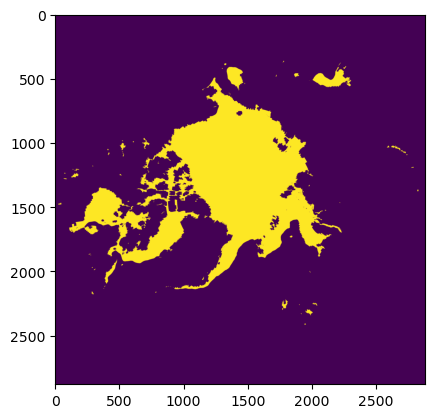

In [32]:
plt.imshow(mask[0])

In [17]:
model = RandomForestRegression.load("data/processed/models/ASP_RFR_model.pkl")
predictions = model.predict(scene, mask=mask)
predictions.data

<xarray.Dataset> Size: 66MB
Dimensions:  (time: 1, y: 2880, x: 2880)
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-04-15
  * y        (y) float64 23kB 4.498e+06 4.495e+06 ... -4.495e+06 -4.498e+06
  * x        (x) float64 23kB -4.498e+06 -4.495e+06 ... 4.495e+06 4.498e+06
Data variables:
    SD_mean  (time, y, x) float64 66MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>

Text(0.5, 1.0, 'Predicted Snow Depth on 2022-04-15')

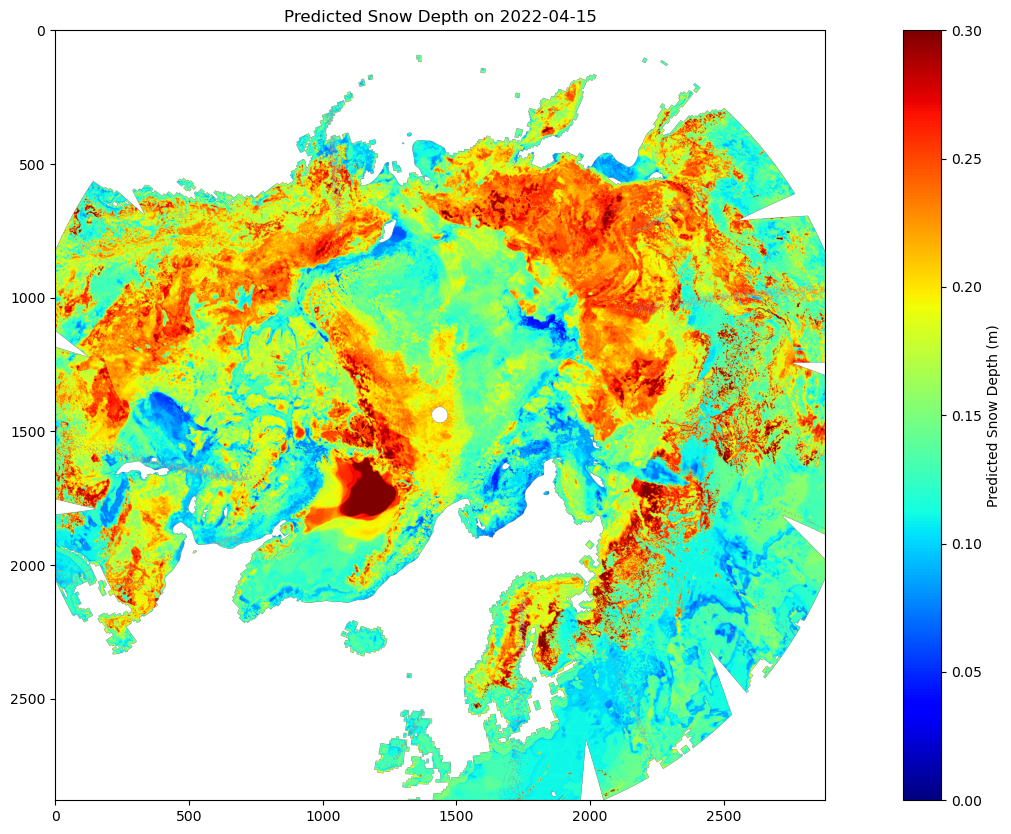

In [18]:
plt.figure(figsize=(20,10))
plt.imshow(predictions.data['SD_mean'].isel(time=0), cmap='jet', vmin=0, vmax=0.3)
plt.colorbar(label='Predicted Snow Depth (m)')
plt.title('Predicted Snow Depth on {}'.format(cur_date))